In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


In [2]:

# Load your custom-trained YOLO model instead of pre-trained
yolo_model = YOLO("yolo_with_all_enhancement_best.pt")

In [4]:

cnn_model = tf.keras.models.load_model("Final___sign_classifier.h5")


classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42'] 


In [ ]:
def detect_signs(image_path):

    image = cv2.imread(image_path)



    results = yolo_model(image) 

    cropped_signs = []  
    print("resutls : " , len(results))
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  
            cropped_sign = image[y1:y2, x1:x2]  
            cropped_sign = cv2.resize(cropped_sign, (32, 32))
            
            cropped_sign = cv2.cvtColor(cropped_sign,cv2.COLOR_BGR2RGB)
            
            cropped_sign = cropped_sign / 255.0  

                
            cropped_signs.append(cropped_sign)

    return cropped_signs  


In [6]:
def classify_signs(cropped_signs):
    predictions = []
    for sign in cropped_signs:
        sign = np.expand_dims(sign, axis=0) 
        pred = cnn_model.predict(sign)
        predicted_class = np.argmax(pred)
        predictions.append(classes[predicted_class])  
    return predictions


In [ ]:

# image_path = "00004.png"
image_path = r"F:\Project\Detection_yolo\enhanced_dataset\images\test"
# image_path = r"F:\Project\Detection_yolo\dataset\images\train\00017.png"
# image_path = r"F:\Project\Detection_yolo\enhanced_low_clahe_no_med\images\train\00017.png"



for i in range (0,300):
    img = str(i).zfill(5) + '.png'
    new_path = os.path.join(image_path,img)
    cropped_signs = detect_signs(new_path)




    predictions = classify_signs(cropped_signs)

    for i, pred in enumerate(predictions):
        print(f"Detected Sign {i+1}: {pred}")
        
    for idx , i in enumerate(cropped_signs):
        cv2.imshow(str(idx) + "th sign " + f"img : ${img}" , i)
        cv2.waitKey(0)
        cv2.destroyAllWindows()



0: 384x640 (no detections), 50.3ms
Speed: 3.4ms preprocess, 50.3ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)
resutls :  1

0: 384x640 1 signboard, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 59.1ms postprocess per image at shape (1, 3, 384, 640)
resutls :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Detected Sign 1: 40

0: 384x640 2 signboards, 220.9ms
Speed: 3.9ms preprocess, 220.9ms inference, 8.6ms postprocess per image at shape (1, 3, 384, 640)
resutls :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Detected Sign 1: 4
Detected Sign 2: 13

0: 384x640 1 signboard, 220.7ms
Speed: 4.4ms preprocess, 220.7ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
resutls :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Detected Sign 1: 10

0: 384x640 1 signboard, 218.8ms
Speed: 3.8ms preprocess, 218.8ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
resutls :  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Detected

0: 384x640 2 signboards, 221.2ms
Speed: 4.6ms preprocess, 221.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
resutls :  1
0


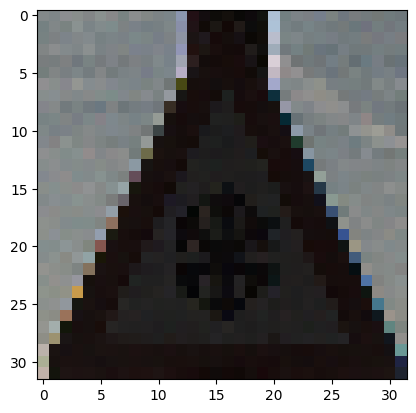

1


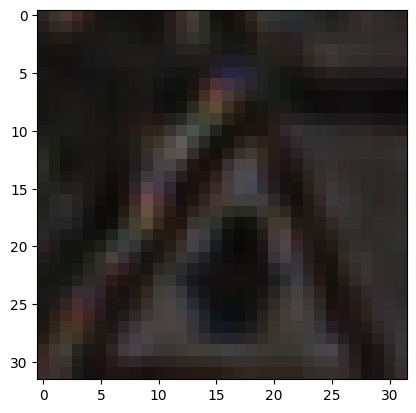

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Detected Sign 1: 30
Detected Sign 2: 11


In [ ]:

# # image_path = "00004.png"
# # image_path = r"F:\Project\Detection_yolo\enhanced_dataset\images\train"
# # image_path = r"F:\Project\Detection_yolo\dataset\images\train\00017.png"
# image_path = r"F:\Project\Detection_yolo\enhanced_low_clahe_no_med\images\train\00017.png"



# cropped_signs = detect_signs(image_path)



# for idx , i in enumerate(cropped_signs):
#     print(idx)
#     plt.imshow(i)
#     plt.show()

# predictions = classify_signs(cropped_signs)

# for i, pred in enumerate(predictions):
#     print(f"Detected Sign {i+1}: {pred}")


0012
